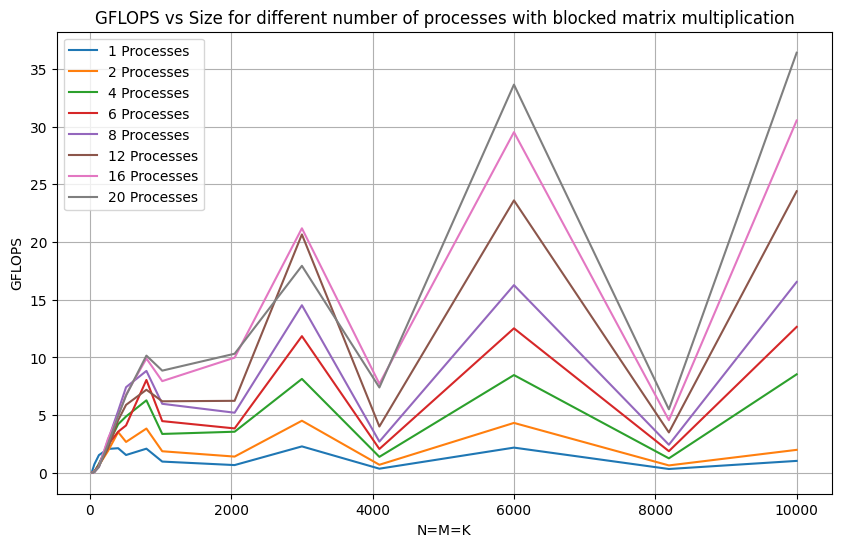

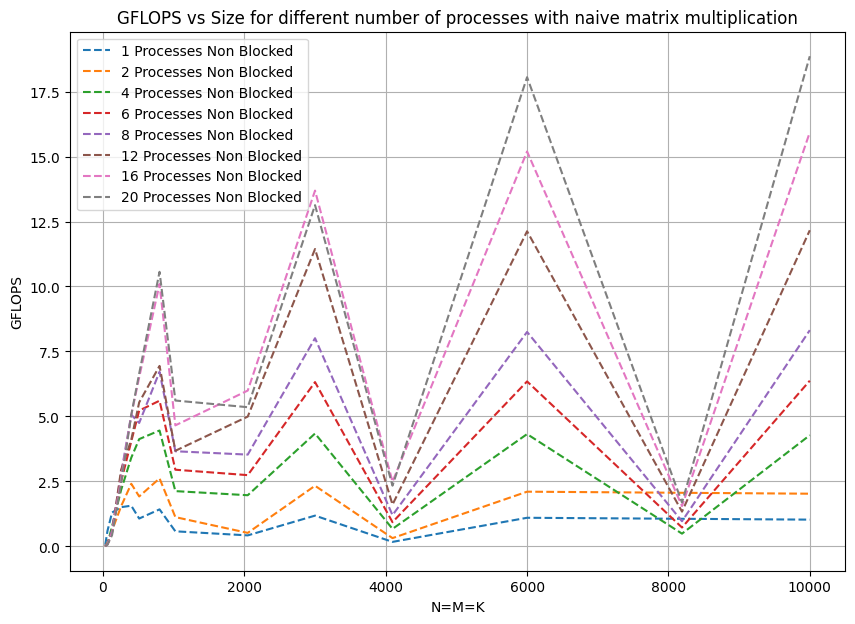

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv("./data/out/result_blocked.csv")
data2 = pd.read_csv("./data/out/result_non_blocked.csv")

#Remove blank spaces from column names
data = data.rename(columns=lambda x: x.strip())
data2= data2.rename(columns=lambda x: x.strip())

#Remove rows with mat_A_rows!=mat_A_cols
data = data[data['mat_A_rows'] == data['mat_A_cols']]
data2 = data2[data2['mat_A_rows'] == data2['mat_A_cols']]
#data=data[data['mat_A_cols'] == 128]
#data2=data2[data2['mat_A_cols'] == 128]

# Group filtered data by number of processes
grouped = data.groupby('num_proc')
grouped2 = data2.groupby('num_proc')

# Plot
plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.plot(group['mat_A_rows'], group['gflops'], label=f'{name} Processes')

plt.xlabel('N=M=K')
#plt.xscale('log')  # Set x-axis scale to logarithmic
plt.ylabel('GFLOPS')
plt.title('GFLOPS vs Size for different number of processes with blocked matrix multiplication')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 7))

for name, group in grouped2:
    plt.plot(group['mat_A_rows'], group['gflops'], label=f'{name} Processes Non Blocked', linestyle='dashed')

plt.xlabel('N=M=K')
#plt.xscale('log')  # Set x-axis scale to logarithmic
plt.ylabel('GFLOPS')
plt.title('GFLOPS vs Size for different number of processes with naive matrix multiplication')
plt.legend()
plt.grid(True)
plt.show()



In [46]:
data

,num_proc,num_proc_row,num_proc_col,block_size,mat_A_rows,mat_A_cols,mat_B_rows,mat_B_cols,gflops,elapsed_time,max_diff,max_rel_diff
0,1,1,1,32,32,32,32,32,0.134430,0.487511,0.0,0.0
4,1,1,1,32,64,64,64,64,0.747320,0.701558,0.0,0.0
8,1,1,1,32,128,128,128,128,1.534973,2.732494,0.0,0.0
12,1,1,1,32,256,256,256,256,2.070663,16.204678,0.0,0.0
17,1,1,1,32,400,400,400,400,2.134900,59.955970,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
511,20,5,4,32,3000,3000,3000,3000,17.941192,3009.833401,0.0,0.0
516,20,5,4,32,4096,4096,4096,4096,7.398716,18576.055341,0.0,0.0
521,20,5,4,32,6000,6000,6000,6000,33.646519,12839.366989,0.0,0.0
526,20,5,4,32,8192,8192,8192,8192,5.505590,199708.243596,0.0,0.0


In [47]:
data_f= data[data['num_proc'] == 20]
data_f2= data2[data2['num_proc'] == 20]

In [48]:
#Take only columns num_proc, problem_size, gflops, elapsed time
data_f = data_f[['num_proc', 'mat_A_rows', 'mat_A_cols', 'gflops', 'elapsed_time']]
data_f2 = data_f2[['num_proc', 'mat_A_rows', 'mat_A_cols', 'gflops', 'elapsed_time']]

In [49]:
data_f

,num_proc,mat_A_rows,mat_A_cols,gflops,elapsed_time
469,20,32,32,0.009659,6.785075
473,20,64,64,0.076470,6.856171
477,20,128,128,0.501846,8.357758
481,20,256,256,2.494691,13.450338
486,20,400,400,4.938980,25.916284
491,20,512,512,6.698935,40.071365
496,20,800,800,10.160185,100.785566
501,20,1024,1024,8.857794,242.440010
506,20,2048,2048,10.322233,1664.355845
511,20,3000,3000,17.941192,3009.833401


In [50]:
data_f2

,num_proc,mat_A_rows,mat_A_cols,gflops,elapsed_time
467,20,32,32,0.009345,7.013261
471,20,64,64,0.069478,7.546133
475,20,128,128,0.432670,9.694004
479,20,256,256,2.441278,13.744617
484,20,400,400,5.056212,25.315395
489,20,512,512,6.649249,40.370796
494,20,800,800,10.563865,96.934219
499,20,1024,1024,5.612172,382.647501
504,20,2048,2048,5.355808,3207.708390
509,20,3000,3000,13.129288,4112.942100


In [51]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./data/out/results1.csv')
#Remove blank spaces from column names
df = df.rename(columns=lambda x: x.strip())

df_squared = df[df['mat_A_rows'] == df['mat_A_cols']]
df_rectangular = df[df['mat_A_rows'] != df['mat_A_cols']]


FileNotFoundError: [Errno 2] No such file or directory: './data/out/results1.csv'

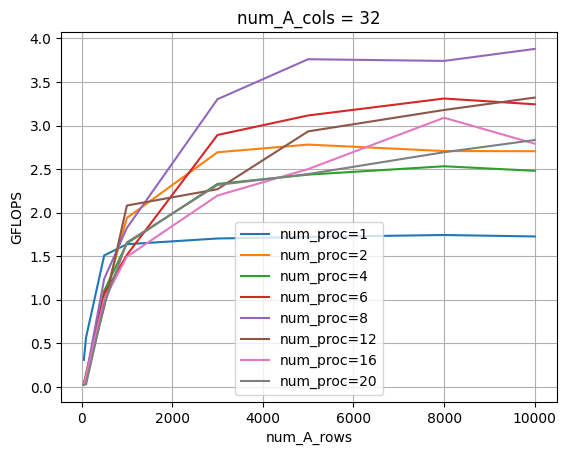

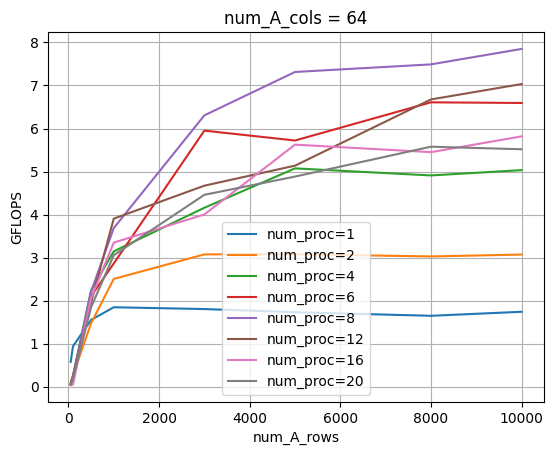

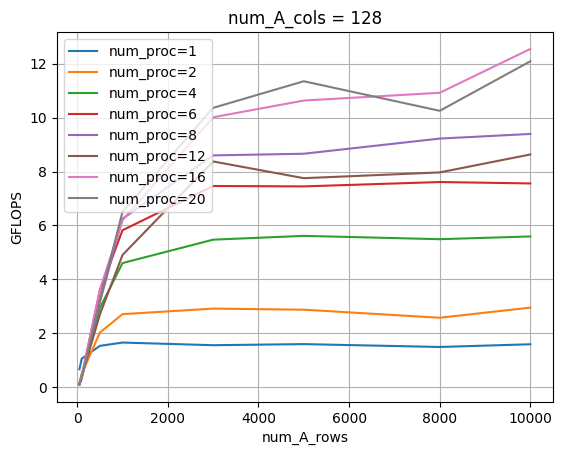

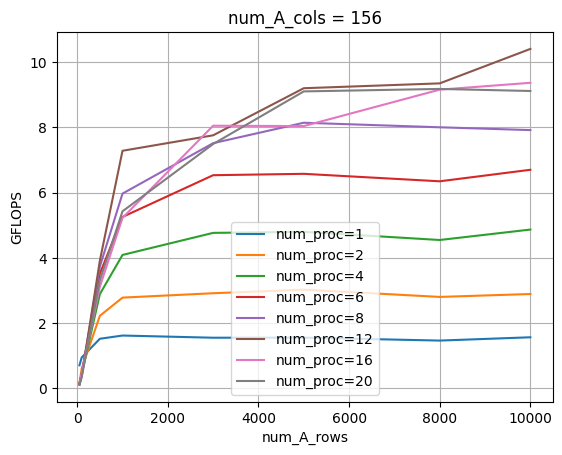

In [ ]:
# Group the DataFrame by 'num_A_cols'
grouped_rectangular = df_rectangular.groupby('mat_A_cols')

# Iterate over groups and plot
for name, group in grouped_rectangular:
    # Create a new figure for each 'num_A_cols'
    plt.figure()
    
    # Group by 'num_proc' and plot each group
    for num_proc, proc_group in group.groupby('num_proc'):
        plt.plot(proc_group['mat_A_rows'], proc_group['gflops'], label=f'num_proc={num_proc}')
    
    # Add labels and legend
    plt.xlabel('num_A_rows')
    #plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.title(f'num_A_cols = {name}')
    plt.ylabel('GFLOPS')
    plt.legend()
    plt.grid(True)
    plt.title(f'num_A_cols = {name}')
    
    # Show plot
    plt.show()